In [2]:
import pandas as pd 
import statsmodels.api as sm 
import numpy as np 
from statsmodels.stats.weightstats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px 

In [3]:
data = pd.read_csv('../data/hospitalisations.csv')
df = data
df.columns = ['date', 'intensive','in-care']
df['total'] = df['intensive'] + df['in-care']
df['date'] = pd.to_datetime(df['date'])
df

,date,intensive,in-care,total
0,2020-02-24,3,1,4
1,2020-02-25,1,1,2
2,2020-02-26,2,1,3
3,2020-02-27,1,0,1
4,2020-02-28,1,1,2
...,...,...,...,...
320,2021-01-09,97,20,117
321,2021-01-10,86,17,103
322,2021-01-11,115,20,135
323,2021-01-12,112,13,125


In [4]:
start_date = '2020-08-02'
end_date = '2020-09-29'
open_date = '2020-08-31'

period = df.loc[(df['date'] > start_date) & (df['date'] < end_date)]
period.reset_index(drop=True, inplace=True)
period['time'] = period.index
# period

<ipython-input-4-e30992e84926>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period['time'] = period.index


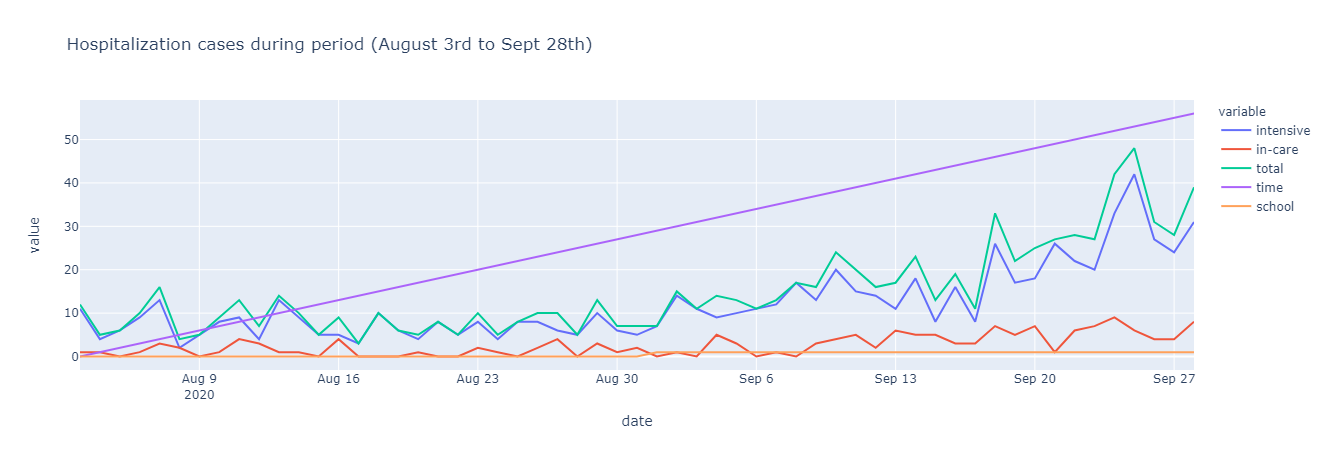

In [9]:
fig = px.line(period, x = 'date', y = period.columns,
              title='Hospitalization cases during period (August 3rd to Sept 28th)')

# why doesnt this work?
# fig.add_vline(x='2020-08-31', line_width=3000, line_color='green')

fig.show()

In [6]:
import statsmodels.formula.api as smf
# setting with copy warning
period['school'] = (period['date'] > open_date).astype(int)
# display(period)
x = pd.DataFrame(period.index)
x.columns = ['time']
x['school'] = period.school
x['time2'] = x.time ** 2
x = sm.add_constant(x)
x['total'] = period.total
# display(x)
# est = sm.OLS(y, x).fit(cov_type='HC2')
est = smf.wls('total ~ school * time2', x).fit()
# y = const + b1 * x + b2 * c
# sm.graphics.plot_fit(est, 'time', vlines=False)

<ipython-input-6-bd2fa730df2c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
period.head()

,date,intensive,in-care,total,time,school
0,2020-08-03,11,1,12,0,0
1,2020-08-04,4,1,5,1,0
2,2020-08-05,6,0,6,2,0
3,2020-08-06,9,1,10,3,0
4,2020-08-07,13,3,16,4,0


In [21]:
y = period['total']
x = period.drop('total', 1)
x['time2'] = x.time ** 2
x['school_poly'] = x['school'] * x['time2'] #poly fit on the right side
re = sm.OLS(y,x).fit(cov_type="HC2")
# re.summary()

# sm.graphics.plot_fit(re, 'time') #time is equal to x axis

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

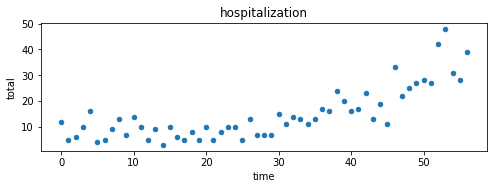

In [112]:
plt.figure(figsize=(8,8))
ax = plt.subplot(3,1,1)
period.plot.scatter(x="time", y="total", ax=ax)
plt.title("hospitalization");

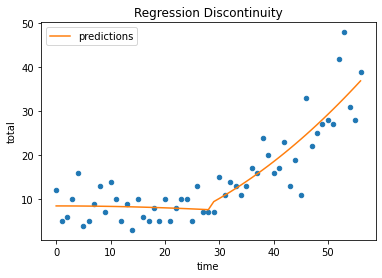

In [117]:
ax = period.plot.scatter(x="time", y="total", color="C0")
period.assign(predictions=est.fittedvalues).plot(x="time", y="predictions", ax=ax, color="C1")
plt.title("Regression Discontinuity");